In [1]:
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import dvv_module
from obspy import UTCDateTime
import scipy

In [3]:
DEM = np.load("driving_factors/DEM.npz")
a = []
for keys in DEM.files:
        print("Available key in NPZfile:", keys)
        a.append(keys)
soil = np.load("driving_factors/Soil_temp.npz")
c = []
for keys in soil.files:
        print("Available key in NPZfile:", keys)
        c.append(keys)
source_test = np.load("driving_factors/source.npz")
d = []
for keys in source_test.files:
        print("Available key in NPZfile:", keys)
        d.append(keys)
events = np.load("driving_factors/events.npz", allow_pickle=True)
e = []
for keys in events.files:
        print("Available key in NPZfile:", keys)
        e.append(keys)
DEM_time = DEM[a[0]]
hpa = DEM[a[1]] 
temp = DEM[a[2]]
pre = DEM[a[3]]
FAH_t = soil[c[0]]
BAS_t = soil[c[1]]
FAH_x = soil[c[2]]
BAS_x = soil[c[3]]
source_t = source_test[d[0]]
source_x = source_test[d[1]]
small_events = events[e[0]]
tiny_events = events[e[1]]
medium_events = events[e[2]]
big_events = events[e[3]]

Available key in NPZfile: DEM_time
Available key in NPZfile: prestad0_f3
Available key in NPZfile: tre005d0_f3
Available key in NPZfile: rka150d0_f3
Available key in NPZfile: FAH_time
Available key in NPZfile: BAS_time
Available key in NPZfile: FAH_tso020d0_f1
Available key in NPZfile: BAS_tso020d0_f1
Available key in NPZfile: source_time
Available key in NPZfile: source_f3
Available key in NPZfile: small_events
Available key in NPZfile: tiny_events
Available key in NPZfile: medium_events
Available key in NPZfile: big_events


CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack007.npy
../../../data/msnoise_v1/stack2npy/CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack007.npy
Station pair: CH.BALST - CH.BOURR
./stretching_meteoswiss/CH.BALST_CH.BOURR_stretching_ZZ_7days_symlag_Filt0.1_1.0.png


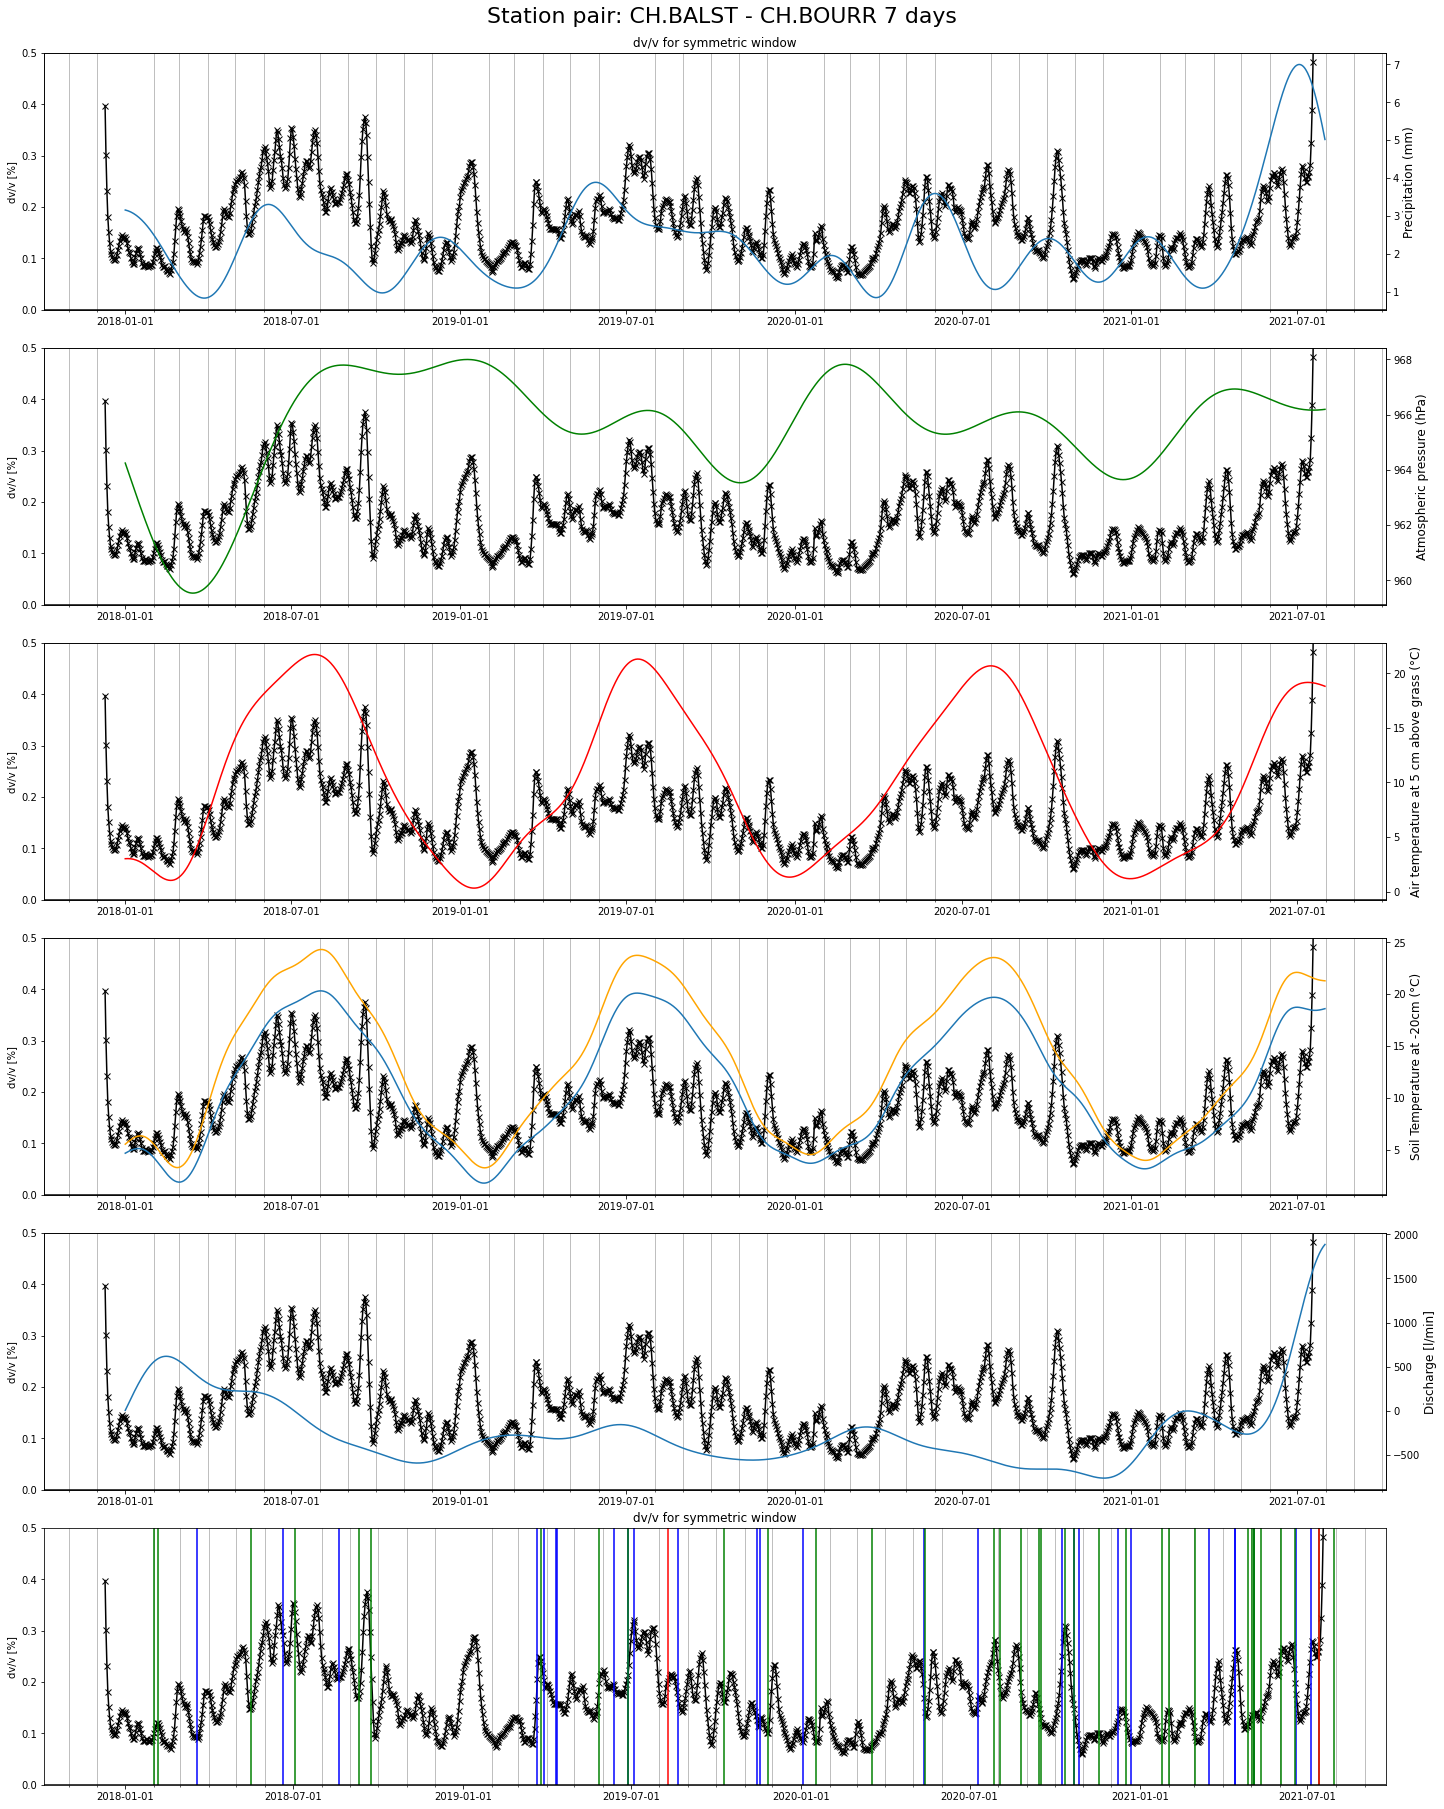

CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack014.npy
../../../data/msnoise_v1/stack2npy/CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack014.npy
Station pair: CH.BALST - CH.BOURR
./stretching_meteoswiss/CH.BALST_CH.BOURR_stretching_ZZ_14days_symlag_Filt0.1_1.0.png


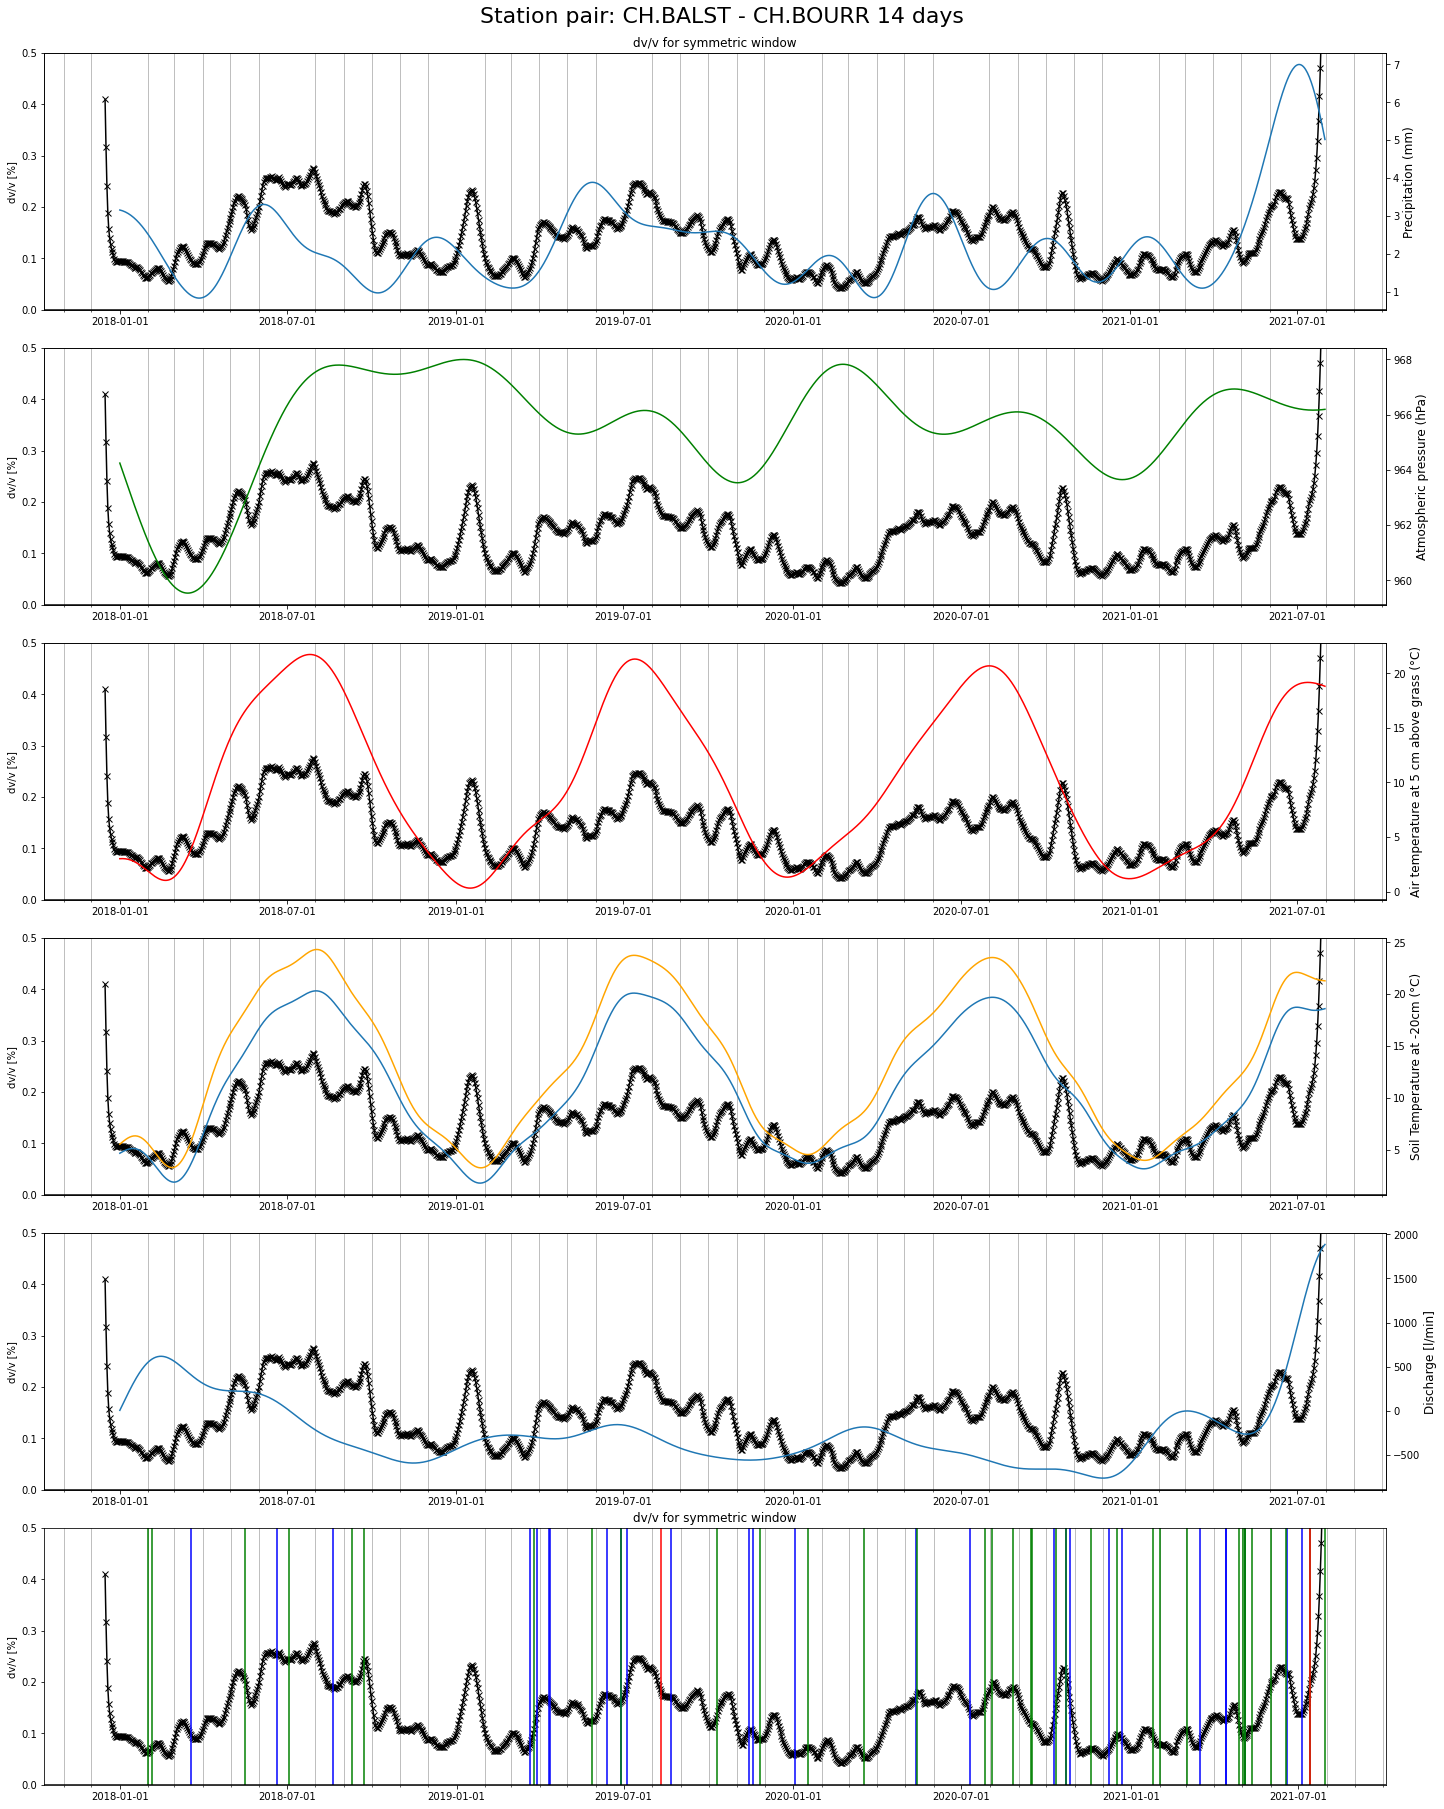

CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack021.npy
../../../data/msnoise_v1/stack2npy/CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack021.npy
Station pair: CH.BALST - CH.BOURR
./stretching_meteoswiss/CH.BALST_CH.BOURR_stretching_ZZ_21days_symlag_Filt0.1_1.0.png


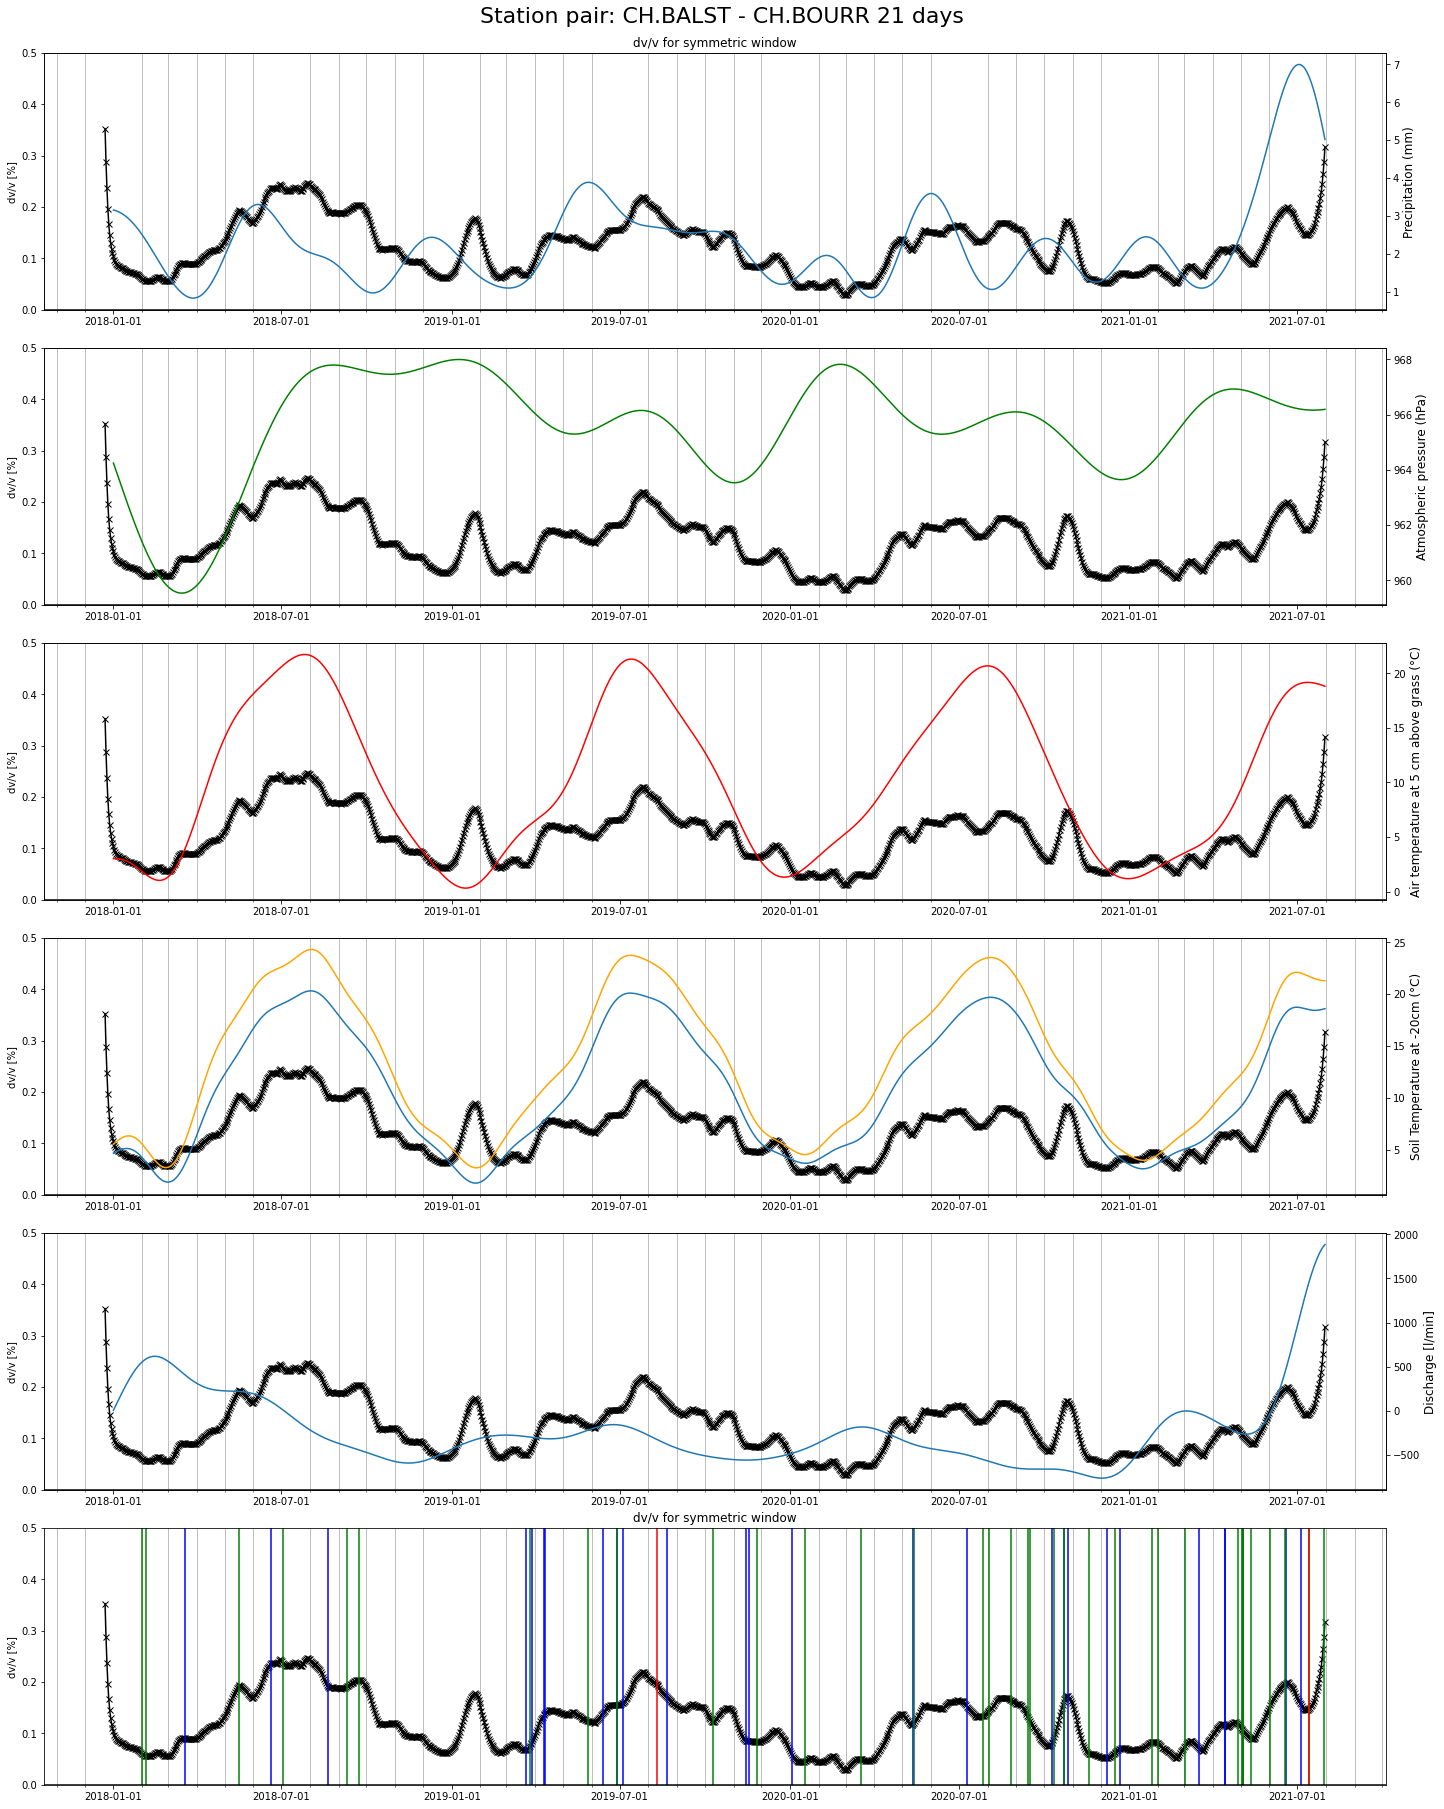

CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack028.npy
../../../data/msnoise_v1/stack2npy/CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack028.npy
Station pair: CH.BALST - CH.BOURR
./stretching_meteoswiss/CH.BALST_CH.BOURR_stretching_ZZ_28days_symlag_Filt0.1_1.0.png


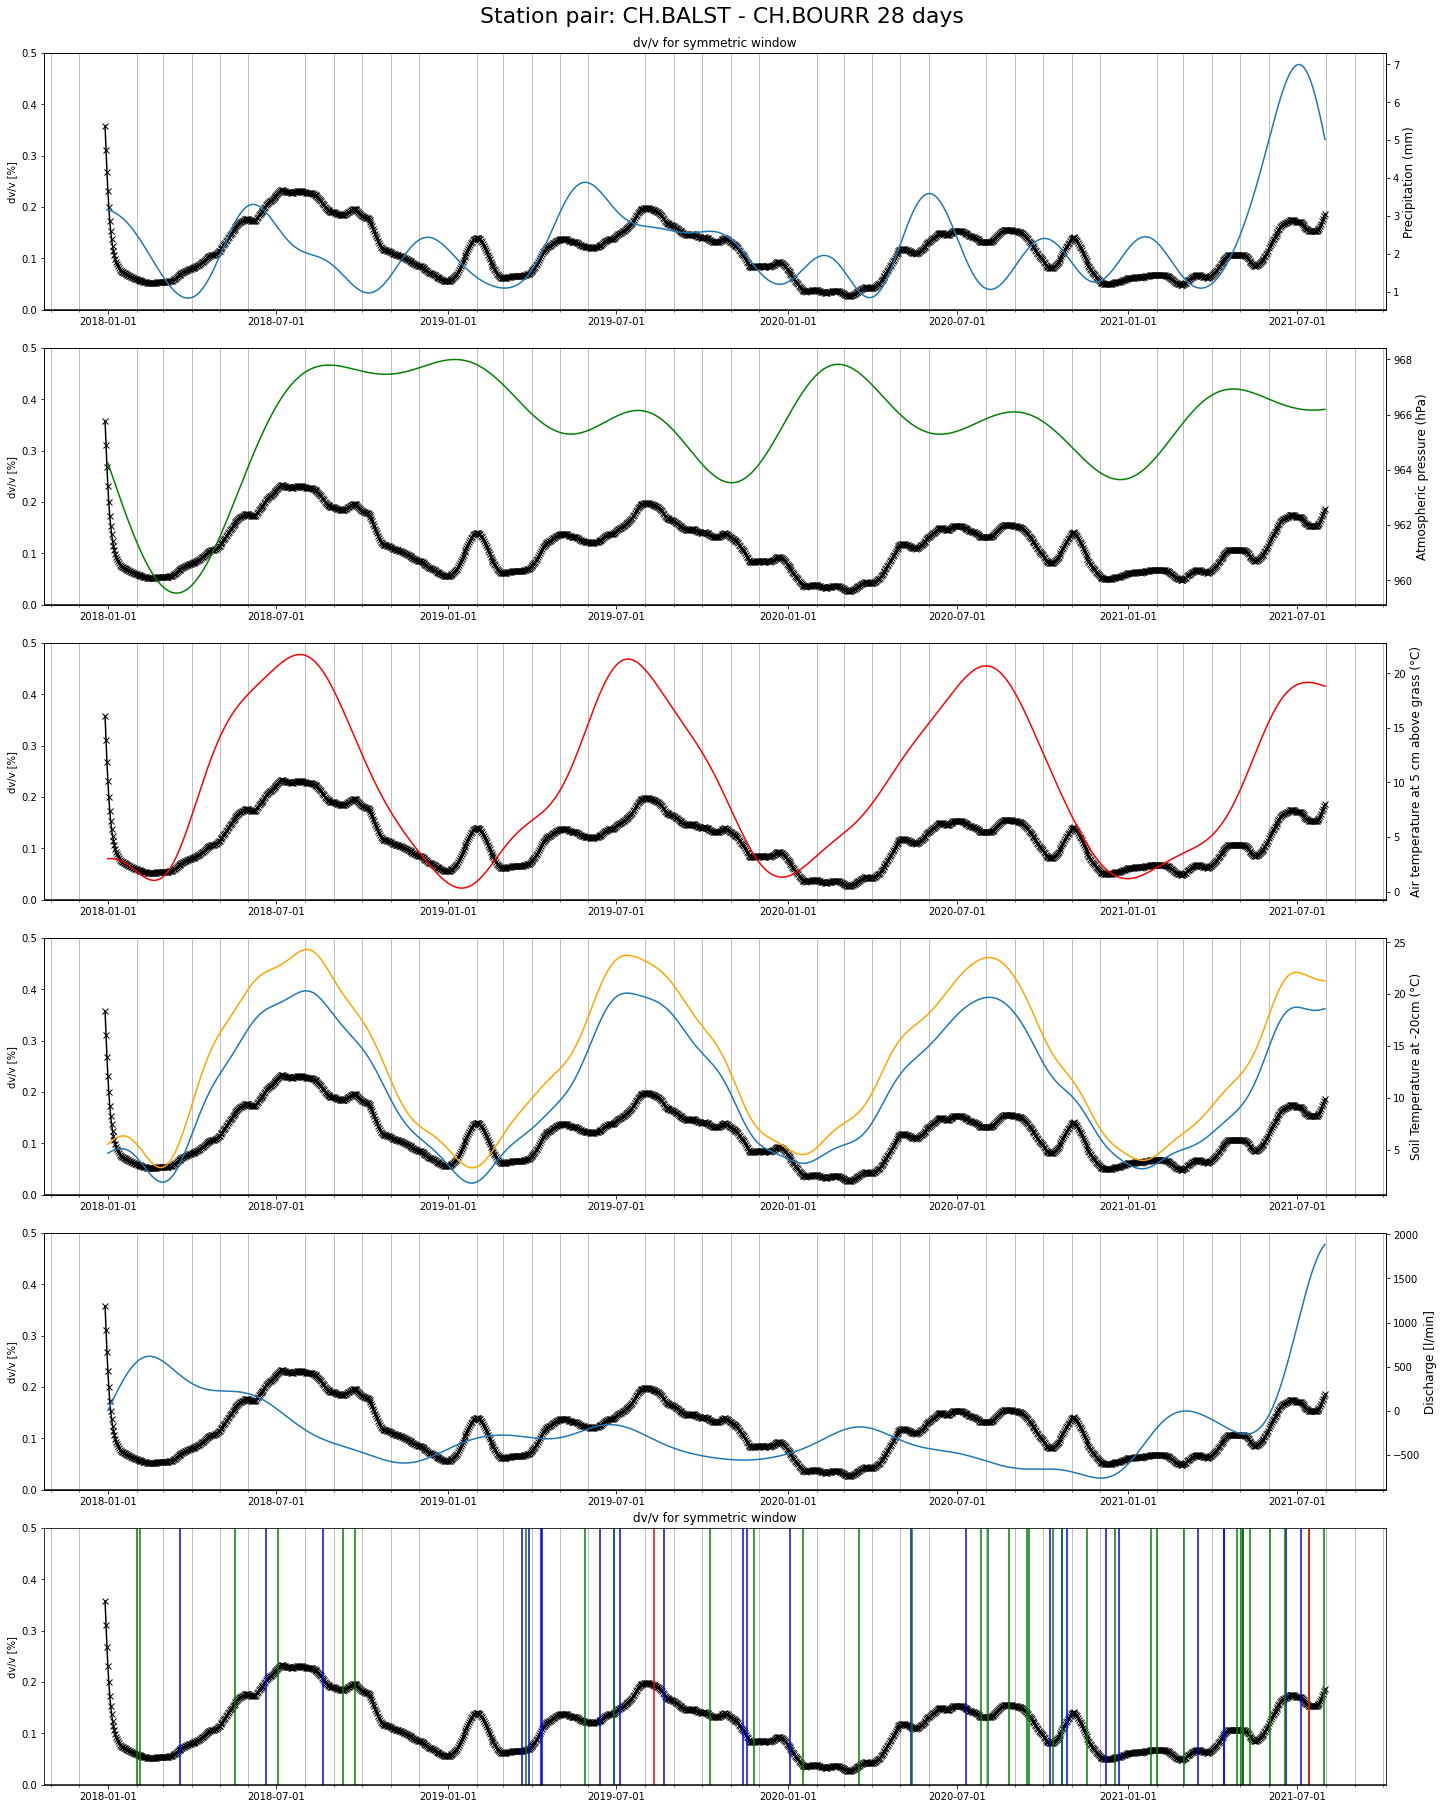

CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack035.npy
../../../data/msnoise_v1/stack2npy/CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack035.npy
Station pair: CH.BALST - CH.BOURR
./stretching_meteoswiss/CH.BALST_CH.BOURR_stretching_ZZ_35days_symlag_Filt0.1_1.0.png


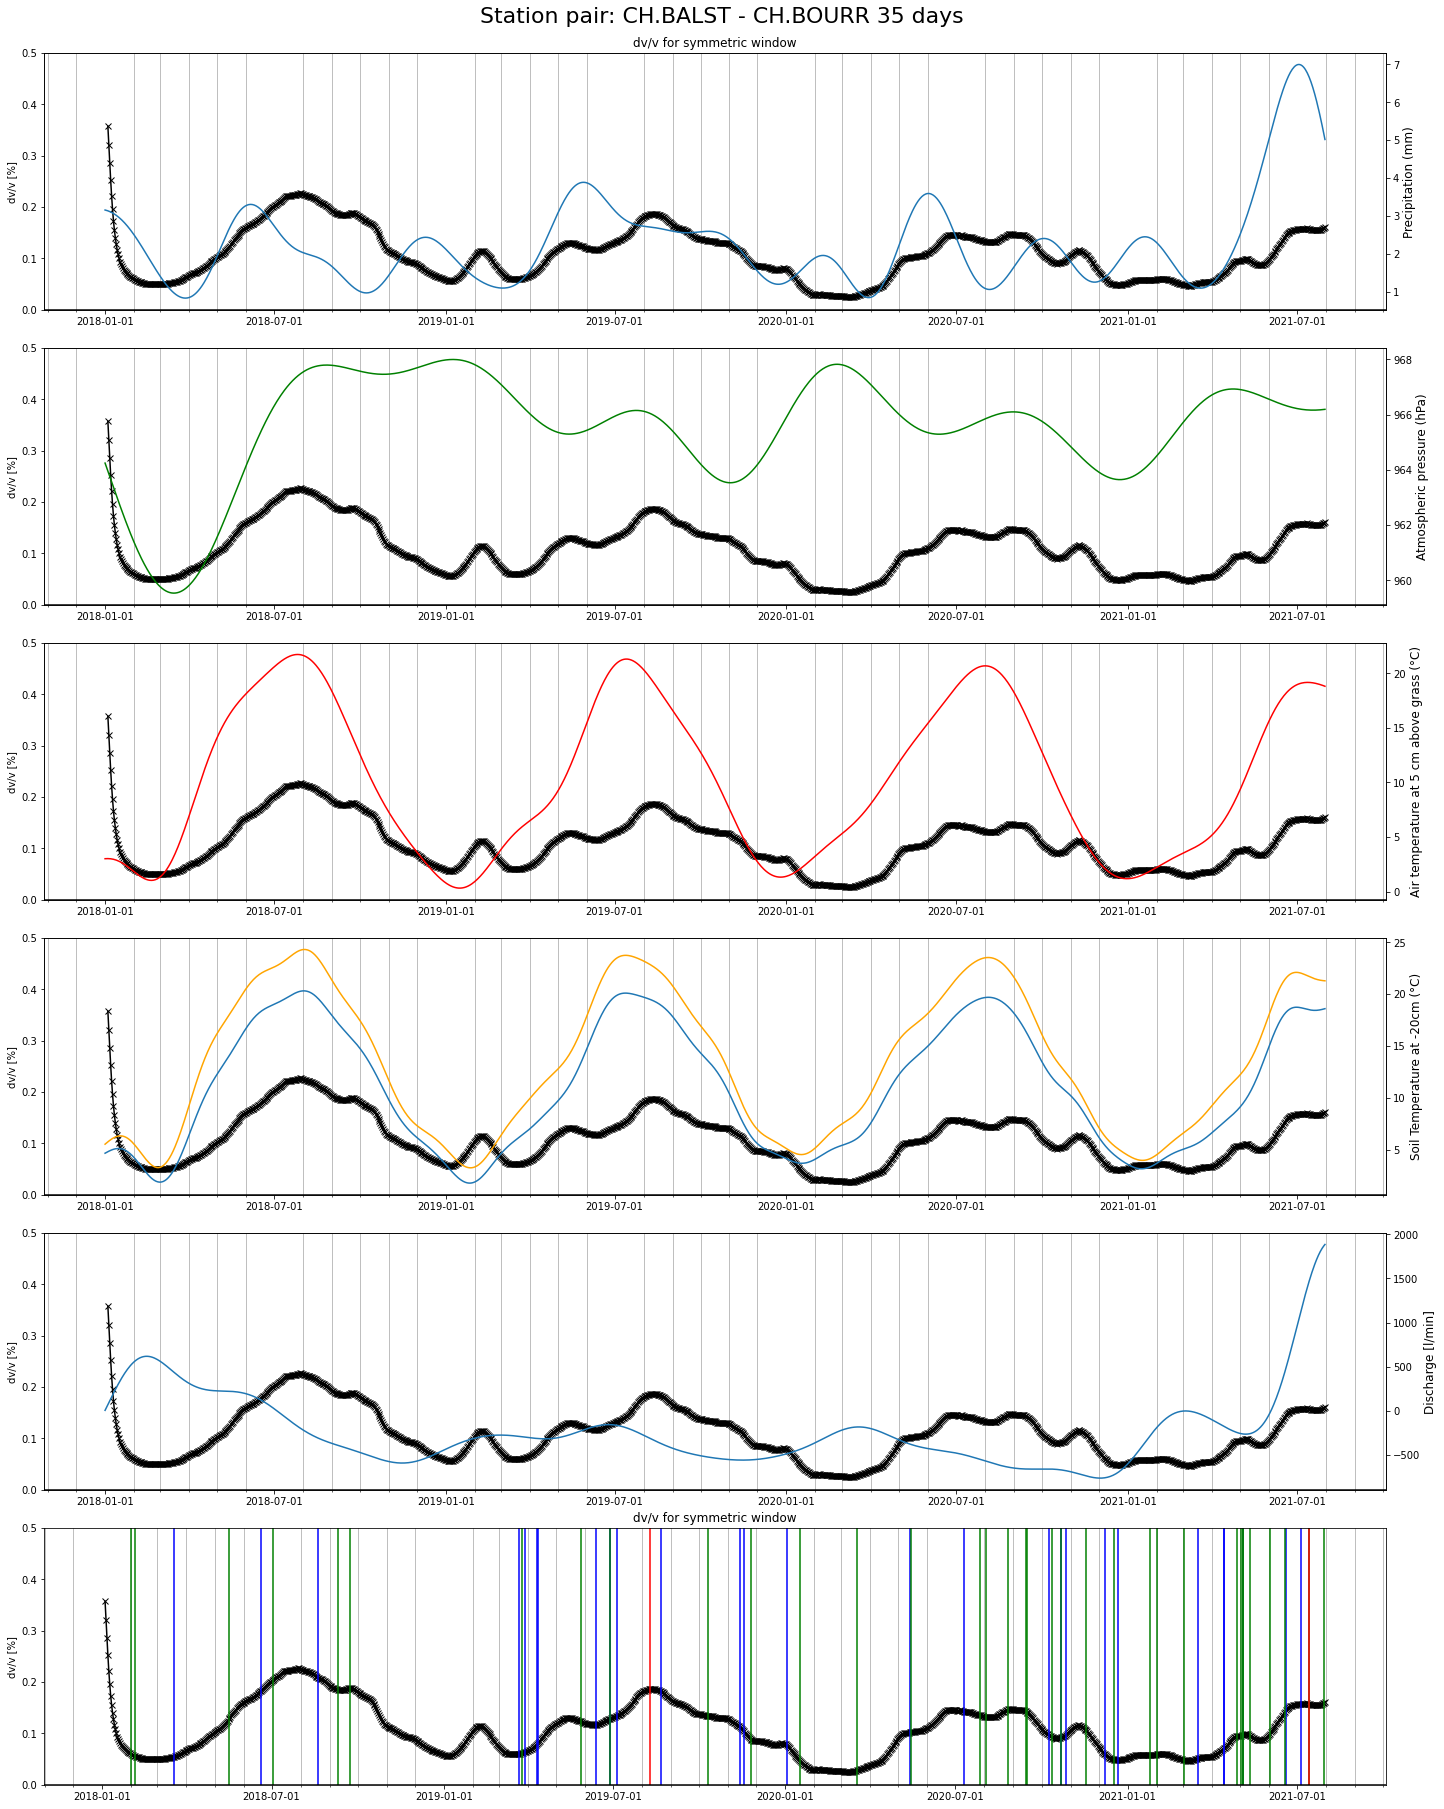

CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack042.npy
../../../data/msnoise_v1/stack2npy/CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack042.npy
Station pair: CH.BALST - CH.BOURR
./stretching_meteoswiss/CH.BALST_CH.BOURR_stretching_ZZ_42days_symlag_Filt0.1_1.0.png


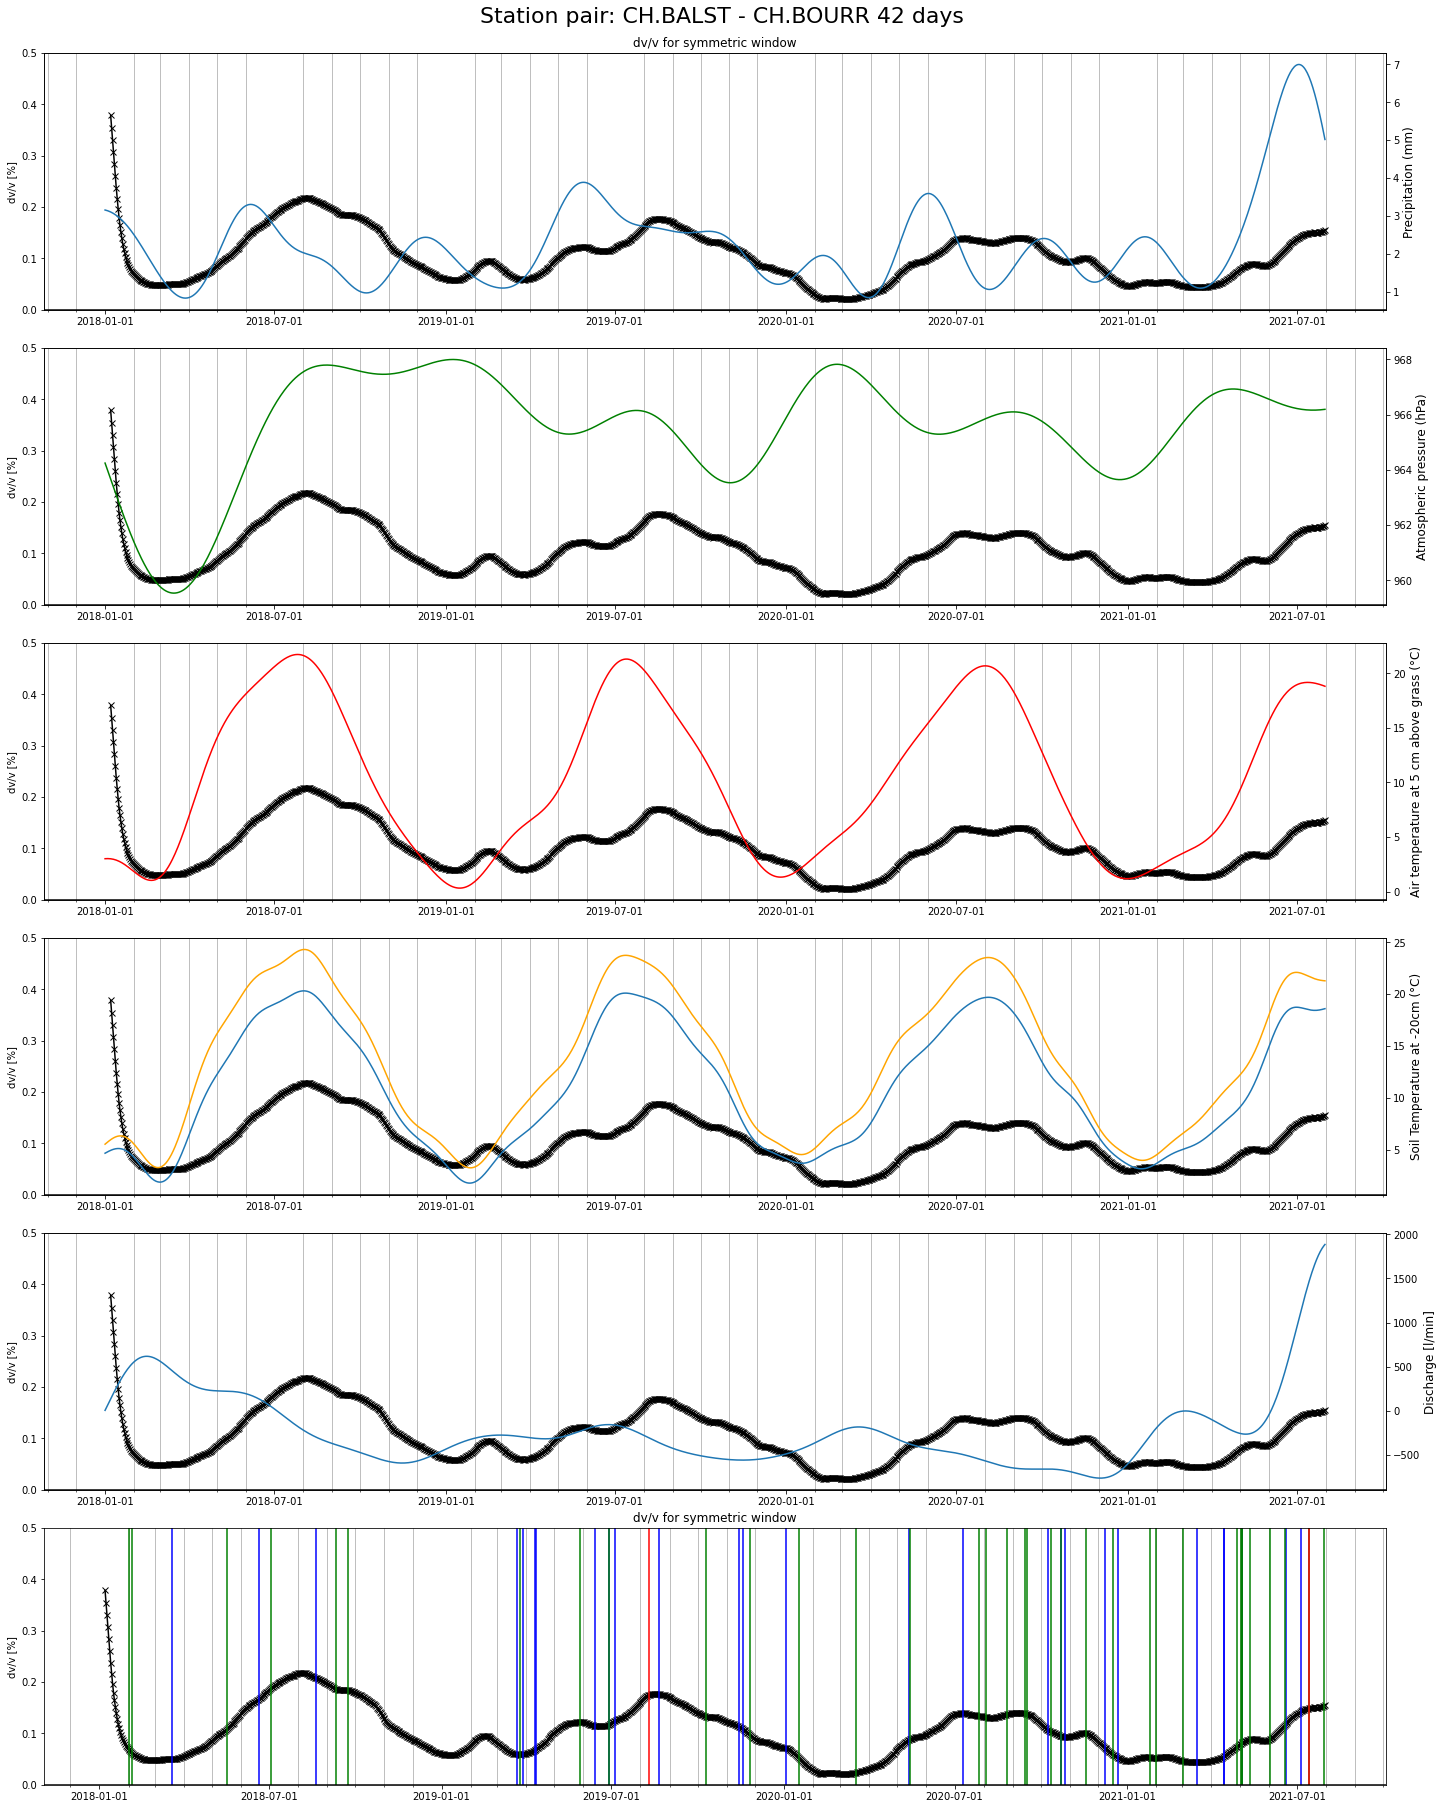

In [5]:
dist1 = 35.68595257075233 #CH.BALST:CH.BOURR 
dist2 = 40.29792484214646 #CH.BALST:CH.MTI02 
dist3 = 46.1448667343124 #CH.BALST:CH.SAIRA
dist4 = 5.150600244956938 #CH.BOURR:CH.MTI02
dist5 = 14.83592263422154 #CH.BOURR:CH.SAIRA 
dist6 = 10.39169529995162 #CH.MTI02:CH.SAIRA 
name1 = ["CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack007.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack014.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack021.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack028.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack035.npy",
        "CH_BALST_CH_BOURR_comp_ZZ_filt0.1_1.0_stack042.npy"]
name2 = ["CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack007.npy",
        "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack014.npy",
        "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack021.npy",
        "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack028.npy",
        "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack035.npy",
        "CH_BALST_CH_MTI02_comp_ZZ_filt0.1_1.0_stack042.npy"]
name3 = ["CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy",
        "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack014.npy",
        "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack021.npy",
        "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack028.npy",
        "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack035.npy",
        "CH_BALST_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack042.npy"]
name4 = ["CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack007.npy",
        "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack014.npy",
        "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack021.npy",
        "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack028.npy",
        "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack035.npy",
        "CH_BOURR_CH_MTI02_comp_ZZ_filt0.1_1.0_stack042.npy"]
name5 = ["CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy",
        "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack014.npy",
        "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack021.npy",
        "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack028.npy",
        "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack035.npy",
        "CH_BOURR_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack042.npy"]
name6 = ["CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack007.npy",
        "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack014.npy",
        "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack021.npy",
        "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack028.npy",
        "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack035.npy",
        "CH_MTI02_CH_SAIRA_comp_ZZ_filt0.1_1.0_stack042.npy"]

name_list = name1
dist = dist1
fil_path = "../../../data/msnoise_v1/stack2npy/"
output_dir = "./stretching_meteoswiss"
tref_start_str = "2019-12-21"
tref_end_str = "2020-03-19"
dvv_max = 4/100 
nbtrial = 100
cc_thresh = 0.1
vmin = 1.5
dist = dist1  
lwin = 15
dpi = 300

def process_station_pairs(name_list, fil_path, output_dir, tref_start_str, tref_end_str, dvv_max, nbtrial, cc_thresh, vmin, dist, lwin, dpi):
    array = np.array([name_list])
    for station_pair in array:
        for element in station_pair:
            print(element)
            input_file = fil_path + element
            print(input_file)

            # Define reference stack start-end time
            tref_start = np.datetime64(tref_start_str)
            tref_end = np.datetime64(tref_end_str)

            # parameters for stretching method
            dvv_max = 2/100    # absolute bound for the velocity variation; example: dv=0.03 for [-3,3]% of relative velocity change ('float')
            nbtrial = 100      # number of increment of dt [-epsilon,epsilon] for the streching
            cc_thresh = 0.1

            # Define lag time window for dv/v analysis
            twin = [int(1.1*dist/vmin), int(1.1*dist/vmin) + lwin]

            """ Extract data from npy and prepare it"""

            # Get station names from file name
            dum = os.path.split(input_file)[1].split("_stacks")[0].split("_")
            sta1 = f"{dum[0]}.{dum[1]}"
            sta2 = f"{dum[2]}.{dum[3]}"
            print(f"Station pair: {sta1} - {sta2}")

            # Read file
            data = np.load(input_file, allow_pickle=True)
            ndata = data["CCdata"].T
            tlag_all = data["tlag"]
            timestamp = data["times"].astype(np.datetime64)
            sampling_rate = data["sampling_rate"]
            fmin   = data["fmin"]
            fmax   = data["fmax"]
            comp   = data["comp"]
            maxlag = data["maxlag"]
            stack  = data["stack"]

            # Define new substack length and step
            stacklen_new = np.timedelta64(int(stack), "D") #5
            step = np.timedelta64(1, "D")

            #dist = data["dist"]
            npts_all = ndata.shape[1]
            npts = npts_all//2
            tlag = tlag_all[npts:]
            ndata_pos = ndata[:, npts:]  # positive lag
            ndata_neg = np.fliplr(ndata[:, :npts + 1])  # negative lag
            ndata_sym = np.mean(np.vstack((ndata_pos[np.newaxis], ndata_neg[np.newaxis])), axis=0)
            twin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0]
            npts_win = len(twin_indx)

            # Get reference stack
            iref = np.where((timestamp > tref_start) & (timestamp < tref_end))[0]
            refstack = np.mean(ndata[iref, :], axis=0)
            refstack_pos = np.mean(ndata_pos[iref, :], axis=0)
            refstack_neg = np.mean(ndata_neg[iref, :], axis=0)
            refstack_sym = np.mean(ndata_sym[iref, :], axis=0)

            # Change substack length
            _, ndata = dvv_module.change_substack_length(timestamp, ndata, stacklen_new, step, dt=1/sampling_rate)
            _, ndata_sym = dvv_module.change_substack_length(timestamp, ndata_sym, stacklen_new, step, dt=1/sampling_rate)
            _, ndata_pos = dvv_module.change_substack_length(timestamp, ndata_pos, stacklen_new, step, dt=1/sampling_rate)
            timestamp, ndata_neg = dvv_module.change_substack_length(timestamp, ndata_neg, stacklen_new, step, dt=1/sampling_rate)

            nwin_indx = np.where((tlag_all <= -np.min(twin)) & (tlag_all > -np.max(twin)))[0] # negative lag time indices for dvv window
            pwin_indx = np.where((tlag_all >= np.min(twin)) & (tlag_all < np.max(twin)))[0] # positive lag time indices for dvv window

            # Get correlation coefficient between substack and reference (before stretching)
            nwin = ndata_sym.shape[0]
            cc_pos = np.zeros(shape=(nwin,), dtype=np.float32)
            cc_neg = np.zeros(shape=(nwin,), dtype=np.float32)
            cc_sym = np.zeros(shape=(nwin,), dtype=np.float32)
            for iwin in range(nwin):
                cc_pos[iwin] = np.corrcoef(refstack_pos[twin_indx], ndata_pos[iwin, twin_indx])[0, 1]
                cc_neg[iwin] = np.corrcoef(refstack_neg[twin_indx], ndata_neg[iwin, twin_indx])[0, 1]
                cc_sym[iwin] = np.corrcoef(refstack_sym[twin_indx], ndata_sym[iwin, twin_indx])[0, 1]

            #insert cross correlation and the time window

            param  = {
                'freq':[fmin,fmax], # frequency of bandpass filter applied to stacks
                'twin': twin,  # start-end of time window in s
                'dt': 1/sampling_rate,  # sampling interval in s
                't': tlag  # vector of lag time
            }

            # Allocate matrix for dvv and its uncertainty
            dvv_stretch = np.empty(shape=(nwin,6),dtype=np.float32)
            ccafter_stretch = np.empty(shape=(nwin,3),dtype=np.float32)

            dvv_stretch[:] = np.nan
            ccafter_stretch[:] = np.nan

            # loop through each substack window
            for iwin in range(nwin):

                # symmetric, casual and acausal lags for both ref and current waveform
                pcur = ndata_pos[iwin,twin_indx]   # substack, positive lag
                ncur = ndata_neg[iwin,twin_indx]   # substack, negative lag
                scur = ndata_sym[iwin,twin_indx]   # substack, symmetric lag
                pref = refstack_pos[twin_indx]  # reference, positive lag
                nref = refstack_neg[twin_indx]  # reference, negative lag
                sref = refstack_sym[twin_indx]  # reference, symmetric lag

                if cc_pos[iwin] >= cc_thresh: # Only keep substack if correlation coefficient before stretching above threshold
                    dvv, error,ccafter_pos,cdp_pos = dvv_module.stretching_vect(pref,pcur,dvv_max,nbtrial,param)
                    dvv_stretch[iwin,0],dvv_stretch[iwin,1] = dvv, error
                    ccafter_stretch[iwin,0] = ccafter_pos
                if cc_neg[iwin] >= cc_thresh:
                    dvv, error,ccafter_neg,cdp_neg = dvv_module.stretching_vect(nref,ncur,dvv_max,nbtrial,param)        
                    dvv_stretch[iwin,2],dvv_stretch[iwin,3] = dvv, error        
                    ccafter_stretch[iwin,1] = ccafter_neg
                if cc_sym[iwin] >= cc_thresh:
                    dvv, error,ccafter_sym,cdp_sym = dvv_module.stretching_vect(sref,scur,dvv_max,nbtrial,param)        
                    dvv_stretch[iwin,4],dvv_stretch[iwin,5] = dvv, error        
                    ccafter_stretch[iwin,2] = ccafter_sym

            t = np.array(timestamp).astype(datetime)

            fig, axs = plt.subplots(6,1,sharex=False, sharey=False, figsize=(20,5*5))
            fig.suptitle(f'Station pair: {sta1} - {sta2}, {stacklen_new} stacks', fontsize=22, y=1)

            axs[0].plot(t, dvv_stretch[:,5], marker="x", color='black')
            axs[0].set_title(f"dv/v for symmetric window", fontsize=12)   
            ax1 = axs[0].twinx()
            ax1.plot(DEM_time[365:-2*365-118], pre[365:-2*365-118])
            ax1.set_ylabel("Precipitation (mm)", fontsize=12)   

            axs[1].plot(t, dvv_stretch[:,5], marker="x", color='black')
            ax2 = axs[1].twinx()
            ax2.plot(DEM_time[365:-2*365-118], hpa[365:-2*365-118], color="g")
            ax2.set_ylabel("Atmospheric pressure (hPa)", fontsize=12) 

            axs[2].plot(t, dvv_stretch[:,5], marker="x", color='black')
            ax3 = axs[2].twinx()
            ax3.plot(DEM_time[365:-2*365-118], temp[365:-2*365-118], color="r")
            ax3.set_ylabel("Air temperature at 5 cm above grass (°C)", fontsize=12) 

            axs[3].plot(t, dvv_stretch[:,5], marker="x", color='black')
            ax4 = axs[3].twinx()
            ax4.plot(FAH_t[365:-2*365-115], FAH_x[365:-2*365-115])
            ax4.plot(BAS_t[365:-2*365-61], BAS_x[365:-2*365-61], color="orange")
            ax4.set_ylabel("Soil Temperature at -20cm (°C)", fontsize=12)

            axs[4].plot(t, dvv_stretch[:,5], marker="x", color='black')
            ax5 = axs[4].twinx()
            ax5.plot(source_t[4*365-5:-2*365-93], source_x[4*365-5:-2*365-93])
            ax5.set_ylabel("Discharge [l/min]", fontsize=12)

            axs[5].plot(t, dvv_stretch[:,5], marker="x", color='black')
            axs[5].set_title(f"dv/v for symmetric window", fontsize=12)   
            # for eq1 in list(small_events['time']):
            #         axs.axvline(x=eq1, color='k', linestyle='--')
            for eq2 in list(tiny_events):
                    axs[5].axvline(x=eq2, color='b')
            for eq3 in list(medium_events):
                    axs[5].axvline(x=eq3, color='green')
            for eq4 in list(big_events):
                    axs[5].axvline(x=eq4, color='red')

            for ax in axs:
                ax.set_ylabel("dv/v [%]")    
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                ax.tick_params(which='major')
                fmt_month = mdates.MonthLocator()
                ax.xaxis.set_minor_locator(fmt_month)
                ax.xaxis.grid(True, which='minor')
                ax.axhline(0, c="k", ls="-")
                ax.set_ylim([0, 0.5])

            output_file = os.path.join(output_dir, f"{sta1}_{sta2}_stretching_{str(comp)}_{str(stacklen_new).replace(' ','')}_symlag_Filt{str(fmin)}_{str(fmax)}.png")
            print(output_file)
            plt.tight_layout(pad=0.5)
            plt.savefig(output_file, dpi=dpi, bbox_inches='tight')
            plt.show()
            plt.close()

process_station_pairs(name_list, fil_path, output_dir, tref_start_str, tref_end_str, dvv_max, nbtrial, cc_thresh, vmin, dist, lwin, dpi)